In [1]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import os
from os.path import isfile, join

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [3]:
results_path = "..\\NativeApp\\results"
result_files = [join(results_path, i) for i in os.listdir(results_path) if isfile(join(results_path, i))]
result_files.sort()
usr_res_files = [list(i) for j, i in itertools.groupby(result_files, lambda a: (a.split('\\')[-1].split('_')[0]))]

In [4]:
def get_vals(files):
    pulsewidths, frequencies, amplitudes = [], [], []
    for file in files:
        with open(file) as f:
            content = np.array([i.split(',') for i in f.read().strip().split('\n')])
            pulsewidth, frequency, amplitude = content.T
            pulsewidths.append(list(map(int,pulsewidth)))
            frequencies.append(list(map(int,frequency)))
            amplitudes.append(list(map(int,amplitude)))
    return np.array(pulsewidths).flatten(), np.array(frequencies).flatten(), np.array(amplitudes).flatten()

In [5]:
all_pw, all_fq, all_amp = get_vals(result_files) #everything (all participants all widgets all combined in single list)

In [6]:
%matplotlib notebook
import time

def plot(vals, ylabel):
    plt.scatter(range(len(vals)), vals)
    plt.xlabel("instance")
    plt.ylabel(ylabel)
    plt.show()
    
def plot3(pw, fq, amp, title):
    plt.figure(figsize=(13,4))
    plt.suptitle(title)
    plt.subplot(1, 3, 1)
    plt.scatter(range(len(pw)), pw)
    plt.xlabel("instance")
    plt.ylabel("Pulsewidth (microseconds)")
    plt.subplot(1, 3, 2)
    plt.scatter(range(len(fq)), fq)
    plt.xlabel("instance")
    plt.ylabel("Frequency (Pulses per second)")
    plt.subplot(1, 3, 3)
    plt.scatter(range(len(amp)), amp)
    plt.xlabel("instance")
    plt.ylabel("Amplitude (milliamps)")
    plt.show()

def plot3d(pw, fq, amp, title="", save_fig=False):
    fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10,5))
    fig.suptitle(title)
    ax.scatter(pw,fq,amp)#, basefmt=" ")
    ax.set_xlabel("Pulsewidth (microseconds)")
    ax.set_ylabel("Frequency (Pulses per second)")
    ax.set_zlabel("Amplitude (milliamps)")
    ax.axes.set_xlim3d(left=0, right=200) 
    ax.axes.set_ylim3d(bottom=0, top=100) 
    ax.axes.set_zlim3d(bottom=0, top=20)
    if save_fig:
        plt.savefig(fname=f"{time.strftime('%Y%m%d-%H%M%S')}.pdf", format='pdf')
    plt.show()

In [7]:
print(f"Mean pulsewidth across every participant and every widget: {np.mean(all_pw)} standard deviation: {np.std(all_pw)}")
print(f"Mean frequency across every participant and every widget: {np.mean(all_fq)} standard deviation: {np.std(all_fq)}")
print(f"Mean amplitude across every participant and every widget: {np.mean(all_amp)} standard deviation: {np.std(all_amp)}")
plot3(all_pw, all_fq, all_amp, "All participants, every widget")
plot3d(all_pw, all_fq, all_amp)

Mean pulsewidth across every participant and every widget: 96.53787878787878 standard deviation: 35.63480706119142
Mean frequency across every participant and every widget: 52.40151515151515 standard deviation: 22.796151937527995
Mean amplitude across every participant and every widget: 11.045454545454545 standard deviation: 2.9409945657570793


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
#all participants but grouped by widget
button_pw, button_fq, button_amp = get_vals(list(filter(lambda s: "button" in s, result_files)))
radio_pw, radio_fq, radio_amp = get_vals(list(filter(lambda s: "radio" in s, result_files)))
multi_pw, multi_fq, multi_amp = get_vals(list(filter(lambda s: "multi" in s, result_files)))
text_pw, text_fq, text_amp = get_vals(list(filter(lambda s: "text" in s, result_files)))

In [9]:
#remove values higher or lower that 2 standard deviations from the data
def truncate_data(data):
    mean = np.mean(data)
    std = np.std(data)
    return [d for d in data if d >= (mean-(2*std)) and d <= (mean+(2*std))]

#This function will take the data for each widget and returns a list of 5 values to be used as presets
#One will be the mean, and two values on either side of the mean
def find_params(data):
    d = np.sort(truncate_data(data))
    mean = np.mean(d)
    step_l = (mean - d[0])/3
    step_r = (d[-1]-mean)/3
    return [mean-(2*step_l), mean-step_l, mean, mean+step_r, mean+(2*step_r)]

In [10]:
button_pw_params = list(map(round, find_params(button_pw)))
button_fq_params = list(map(round, find_params(button_fq)))
button_amp_params = list(map(round, find_params(button_amp)))
radio_pw_params = list(map(round, find_params(radio_pw)))
radio_fq_params = list(map(round, find_params(radio_fq)))
radio_amp_params = list(map(round, find_params(radio_amp)))
multi_pw_params = list(map(round, find_params(multi_pw)))
multi_fq_params = list(map(round, find_params(multi_fq)))
multi_amp_params = list(map(round, find_params(multi_amp)))
text_pw_params = list(map(round, find_params(text_pw)))
text_fq_params = list(map(round, find_params(text_fq)))
text_amp_params = list(map(round, find_params(text_amp)))

button_params = list(zip(button_pw_params, button_fq_params, button_amp_params))
radio_params = list(zip(radio_pw_params, radio_fq_params, radio_amp_params))                    
multi_params = list(zip(multi_pw_params, multi_fq_params, multi_amp_params))                    
text_params = list(zip(text_pw_params, text_fq_params, text_amp_params))                    

print("The following params are what we will use as presets for phase 2")
print(button_params)
print(radio_params)
print(multi_params)
print(text_params)

The following params are what we will use as presets for phase 2
[(64, 29, 8), (78, 42, 10), (92, 56, 11), (116, 70, 12), (139, 85, 14)]
[(66, 20, 8), (81, 34, 9), (97, 47, 10), (115, 56, 12), (132, 66, 13)]
[(50, 23, 8), (70, 36, 10), (89, 49, 11), (113, 59, 14), (137, 70, 16)]
[(59, 20, 8), (78, 34, 9), (97, 49, 11), (118, 59, 12), (139, 70, 14)]


In [11]:
print(f"Mean pulsewidth for button widget: {np.mean(button_pw)} standard deviation: {np.std(button_pw)}")
print(f"Mean frequency for button widget: {np.mean(button_fq)} standard deviation: {np.std(button_fq)}")
print(f"Mean amplitude for button widget: {np.mean(button_amp)} standard deviation: {np.std(button_amp)}")
plot3(button_pw, button_fq, button_amp, "Button widget - all participants")
plot3d(button_pw, button_fq, button_amp, title="Button widget all responses")

Mean pulsewidth for button widget: 97.06060606060606 standard deviation: 34.89546240705785
Mean frequency for button widget: 53.878787878787875 standard deviation: 22.89469645580586
Mean amplitude for button widget: 11.181818181818182 standard deviation: 2.8225772175018227


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
print(f"Mean pulsewidth for radio widget: {np.mean(radio_pw)} standard deviation: {np.std(radio_pw)}")
print(f"Mean frequency for radio widget: {np.mean(radio_fq)} standard deviation: {np.std(radio_fq)}")
print(f"Mean amplitude for radio widget: {np.mean(radio_amp)} standard deviation: {np.std(radio_amp)}")
plot3(radio_pw, radio_fq, radio_amp, "Radio widget - all participants")
plot3d(radio_pw, radio_fq, radio_amp)

Mean pulsewidth for radio widget: 99.96969696969697 standard deviation: 33.37798662018522
Mean frequency for radio widget: 51.75757575757576 standard deviation: 22.672945168369658
Mean amplitude for radio widget: 10.454545454545455 standard deviation: 2.2842133993991216


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
print(f"Mean pulsewidth for multi-select widget: {np.mean(multi_pw)} standard deviation: {np.std(multi_pw)}")
print(f"Mean frequency for multi-select widget: {np.mean(multi_fq)} standard deviation: {np.std(multi_fq)}")
print(f"Mean amplitude for multi-select widget: {np.mean(multi_amp)} standard deviation: {np.std(multi_amp)}")
plot3(multi_pw, multi_fq, multi_amp, "Multi select widget - all participants")
plot3d(multi_pw, multi_fq, multi_amp)

Mean pulsewidth for multi-select widget: 92.48484848484848 standard deviation: 40.41385991787832
Mean frequency for multi-select widget: 53.666666666666664 standard deviation: 22.318176675100723
Mean amplitude for multi-select widget: 11.727272727272727 standard deviation: 3.6537463320478567


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
print(f"Mean pulsewidth for text widget: {np.mean(text_pw)} standard deviation: {np.std(text_pw)}")
print(f"Mean frequency for text widget: {np.mean(text_fq)} standard deviation: {np.std(text_fq)}")
print(f"Mean amplitude for text widget: {np.mean(text_amp)} standard deviation: {np.std(text_amp)}")
plot3(text_pw, text_fq, text_amp, "Text box widget - all participants")
plot3d(text_pw, text_fq, text_amp)

Mean pulsewidth for text widget: 96.63636363636364 standard deviation: 32.95158816406935
Mean frequency for text widget: 50.303030303030305 standard deviation: 23.102518357391844
Mean amplitude for text widget: 10.818181818181818 standard deviation: 2.6793774203873446


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
average_pw = []
average_fq = []
average_amp = []
for i, user in enumerate(usr_res_files):
    user_pw, user_fq, user_amp = get_vals(user)
    plot3d(user_pw, user_fq, user_amp, f"User {i+1}")
    average_pw.append(np.mean(user_pw))
    average_fq.append(np.mean(user_fq))
    average_amp.append(np.mean(user_amp))
    
plot3d(np.array(average_pw), np.array(average_fq), np.array(average_amp), "Average values per user")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-6-9d3cb686fdd7>:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10,5))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


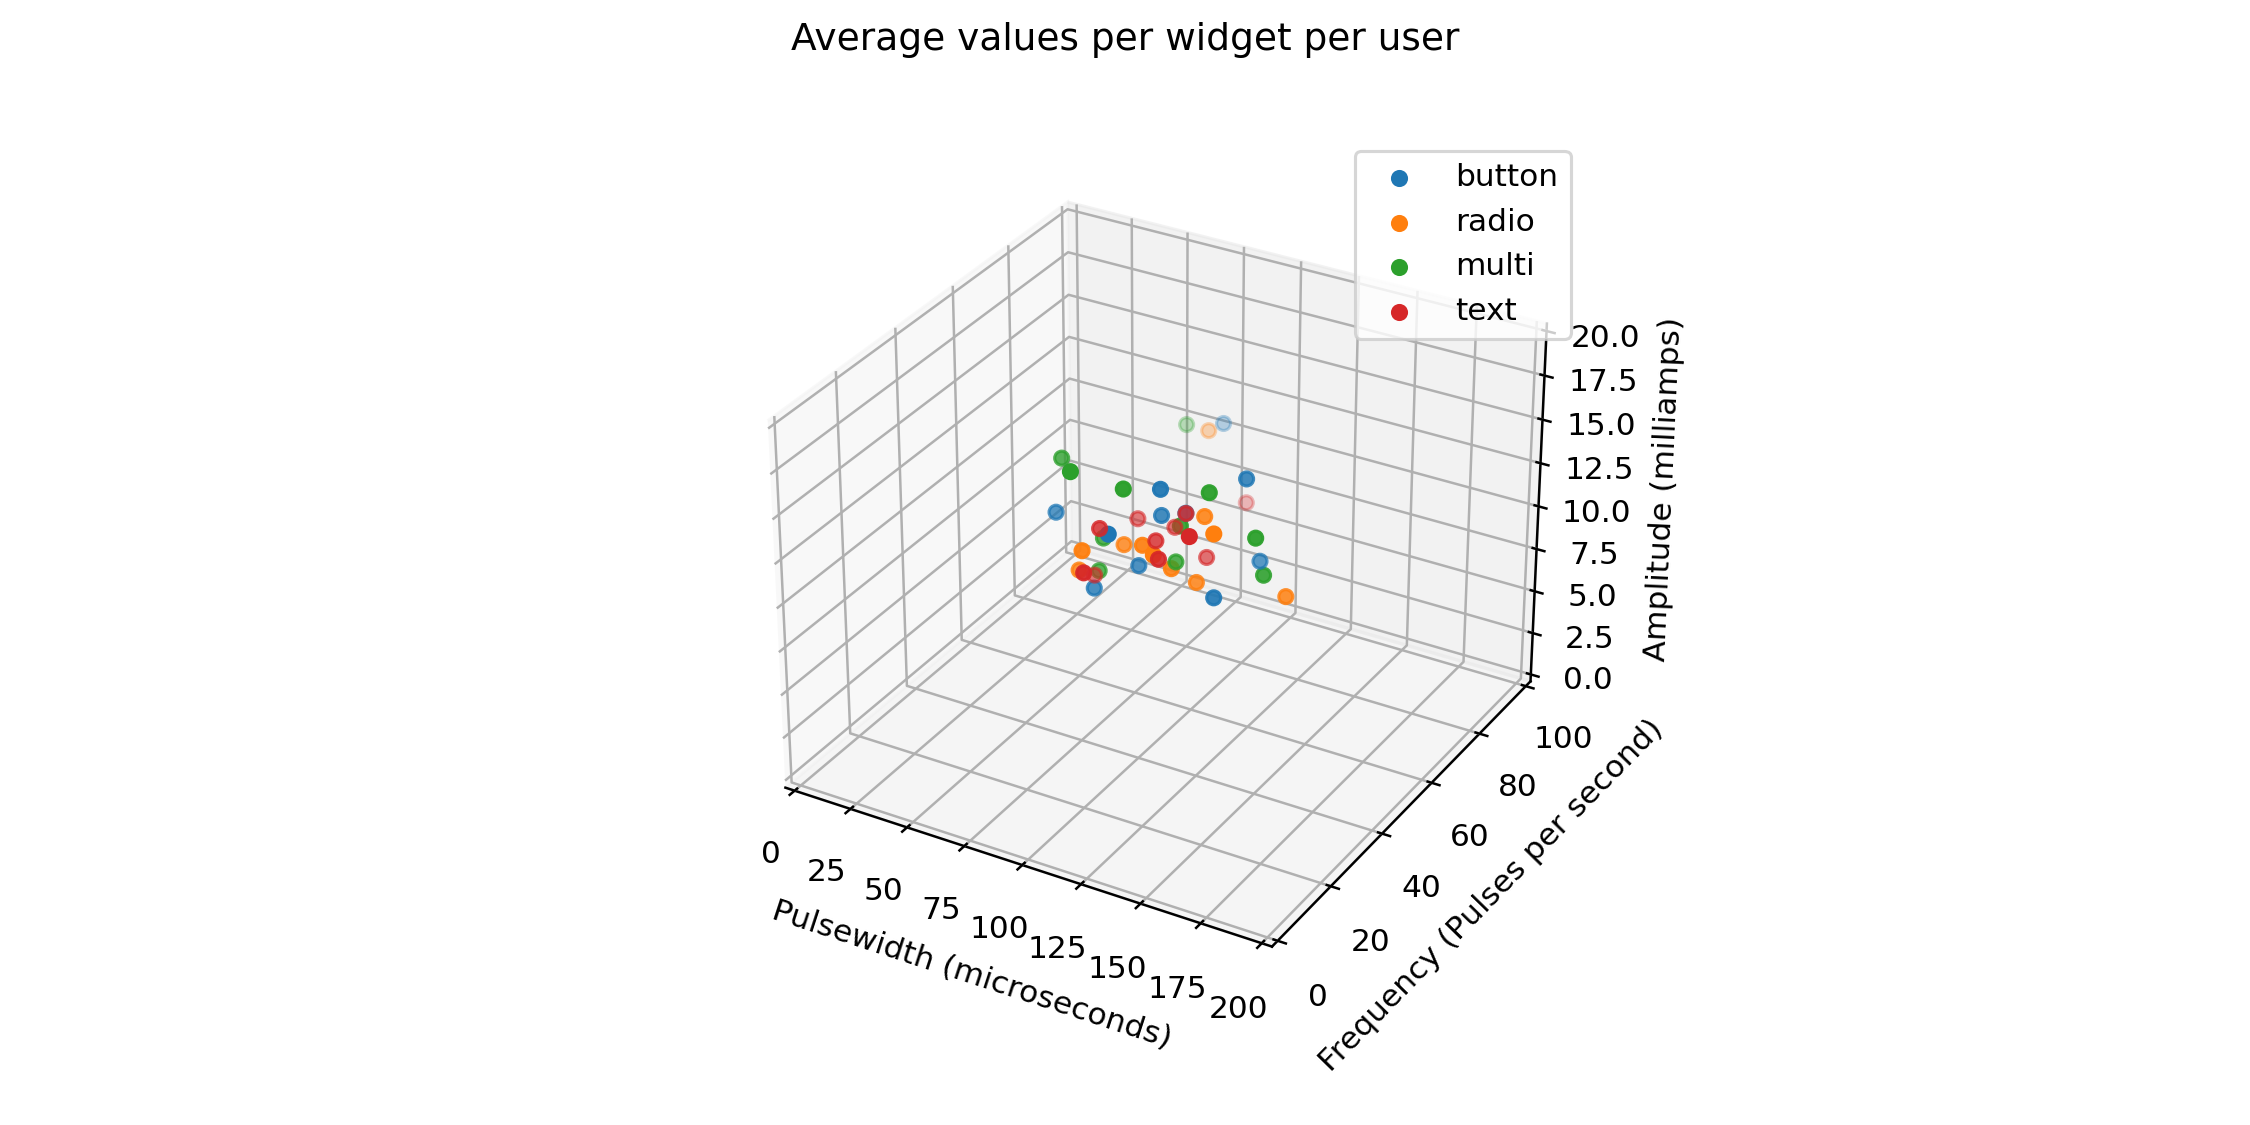

{8, 1, 7} 3
{0, 2, 7} 3
{0, 1, 3, 7, 8, 9} 6
{8, 7} 2
[[[126.66666667  45.           9.33333333]
  [ 56.66666667  46.66666667  11.33333333]
  [126.33333333  63.           9.        ]
  [121.33333333  62.          13.66666667]
  [ 96.66666667  51.66666667  12.        ]
  [ 90.66666667  48.33333333   9.33333333]
  [102.          46.66666667  14.33333333]
  [ 70.          99.          10.33333333]
  [ 80.33333333  40.66666667   8.66666667]
  [ 93.33333333  35.          13.        ]
  [103.66666667  54.66666667  12.        ]]

 [[143.33333333  57.66666667   8.33333333]
  [ 80.          36.66666667  11.33333333]
  [111.33333333  52.           8.66666667]
  [124.66666667  46.66666667  12.66666667]
  [106.66666667  40.          11.66666667]
  [ 82.33333333  50.          10.        ]
  [ 97.33333333  44.          11.33333333]
  [ 63.33333333  99.           9.66666667]
  [ 73.          41.33333333   9.33333333]
  [106.66666667  46.66666667  10.        ]
  [111.          55.33333333  12.        

In [68]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

user_widget = {"button": [], "radio": [], "multi": [], "text": []}
for i, user in enumerate(usr_res_files):
    for file in user:
        widget = file.split('\\')[-1].split('_')[1].split('.')[0]
        user_widget_pw, user_widget_fq, user_widget_amp = get_vals([file])
        user_widget[widget].append((np.mean(user_widget_pw), np.mean(user_widget_fq), np.mean(user_widget_amp)))
        
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10,5))
fig.suptitle("Average values per widget per user")
for widget, values in user_widget.items():
    v = np.array(values)
    pw = v[:,0]
    fq = v[:,1]
    amp = v[:,2]
    
    l = list(np.where(pw<60)[0])
    l+=list(np.where(pw>130)[0])
    l+=list(np.where(fq<30)[0])
    l+= list(np.where(fq>65)[0])
    l+=list(np.where(amp<9)[0])
    l+= list(np.where(amp>15)[0])
    print(set(l), len(set(l)))
    
    ax.scatter(pw,fq,amp, label=widget)

ax.set_xlabel("Pulsewidth (microseconds)")
ax.set_ylabel("Frequency (Pulses per second)")
ax.set_zlabel("Amplitude (milliamps)")
ax.axes.set_xlim3d(left=0, right=200) 
ax.axes.set_ylim3d(bottom=0, top=100) 
ax.axes.set_zlim3d(bottom=0, top=20)
ax.legend()
plt.show()

print(np.array(list(user_widget.values())))

In [ ]:
#Lets look at the questionaire
responses = []
with open("../Questionnaire/Electrotactile Feedback.csv") as f:
    responses = [i.replace('"','').split(',')[:11] for i in f.read().split('\n')] #dont include last two long form answers
    responses.pop(0)

responses = np.array(responses)
words = [i.split('-') for i in responses[:,10]]
all_words = []
stopwords = set(STOPWORDS)
for user_words in words:
    for word in user_words:
        all_words.append(word.strip().lower())

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(" ".join(all_words)+" ")

plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


In [ ]:
mailing_list_users = [r[7] for r in responses if r[6] == "Yes"]
result_mail_users = [r[7] for r in responses if r[5] == "Yes"]
